### Simulate Dynamic Systems in Python

A step response is a common evaluation of the dynamics of a simulated system. A linear time invariant (LTI) system can be described equivalently as a transfer function, a state space model, or solved numerically with and ODE integrator. This tutorial shows how to simulate a second order system in Python.

### Second Order System Simulation

1. Laplace Domain, Transfer Function

$\frac{Y(s)}{U(s)} = \frac{K_p}{\tau_s^2 s^2 + 2 \zeta \tau_s s + 1}e^{-\theta_p s}$

2. State Space Form

$\begin{bmatrix}\dot x_1\\\dot x_2\end{bmatrix} = \begin{bmatrix}0&1\\-\frac{1}{\tau_s^2}&-\frac{2 \zeta}{\tau_s}\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} + \begin{bmatrix}0\\\frac{K_p}{\tau_{s}^2}\end{bmatrix} u\left(t-\theta_p\right)$

$y = \begin{bmatrix}1 & 0\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} + \begin{bmatrix}0\end{bmatrix} u$

3. Second Order Differential Equation

$\tau_s^2 \frac{d^2y}{dt^2} + 2 \zeta \tau_s \frac{dy}{dt} + y = K_p \, u\left(t-\theta_p \right)$

* $K_p    = 2.0$  # gain
* $\tau   = 1.0$  # time constant
* $\zeta  = 0.25$ # damping factor
* $\theta = 0.0$  # no time delay

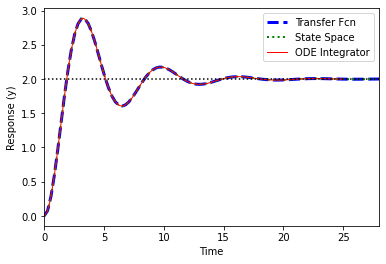

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u
Kp = 2.0    # gain
tau = 1.0   # time constant
zeta = 0.25 # damping factor
theta = 0.0 # no time delay
du = 1.0    # change in u

# (1) Transfer Function
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = [[0.0,1.0],[-1.0/tau**2,-2.0*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt,dy2dt2]
t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]

plt.figure(1)
plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
y_ss = Kp * du
plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.savefig('2nd_order.png')
plt.show()